In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


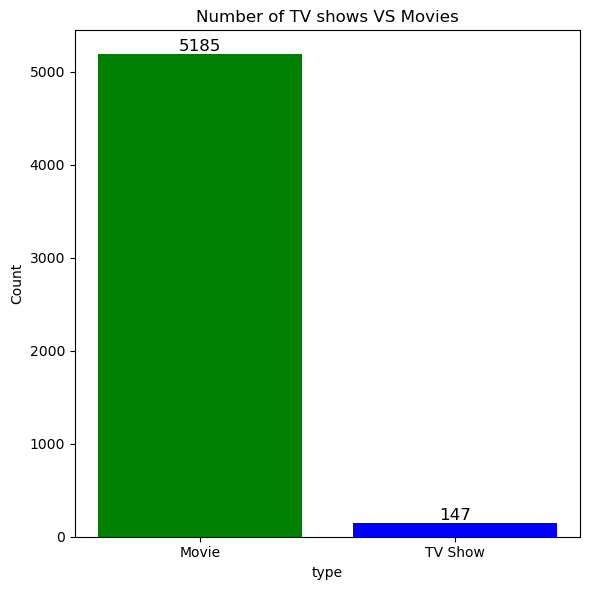

In [12]:
df = df.dropna(subset = ["show_id", "type", "title", "director", "cast", "country", "date_added", "release_year", "rating", "duration", "listed_in", "description"])
type_counts = df["type"].value_counts()
plt.figure(figsize=(6,6))
bars = plt.bar(type_counts.index, type_counts.values, color = ["green", "blue"])
plt.title("Number of TV shows VS Movies")
plt.xlabel("type")
plt.ylabel("Count")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  #for mid position of bar
        height,                             #top of bar
        str(height),                        #text
        ha="center", va="bottom", fontsize=12)
plt.tight_layout()
plt.savefig("Movies_vs_show.png")

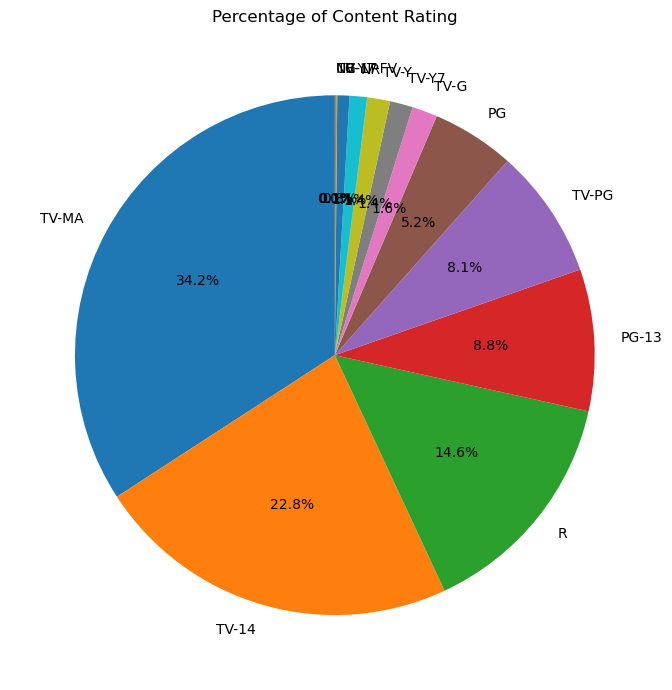

In [17]:
rating_counts = df["rating"].value_counts()
plt.figure(figsize = (7,7))
plt.pie(rating_counts, labels = rating_counts.index, autopct = "%1.1f%%", startangle = 90)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig("content_rating_pie.png")
plt.show()

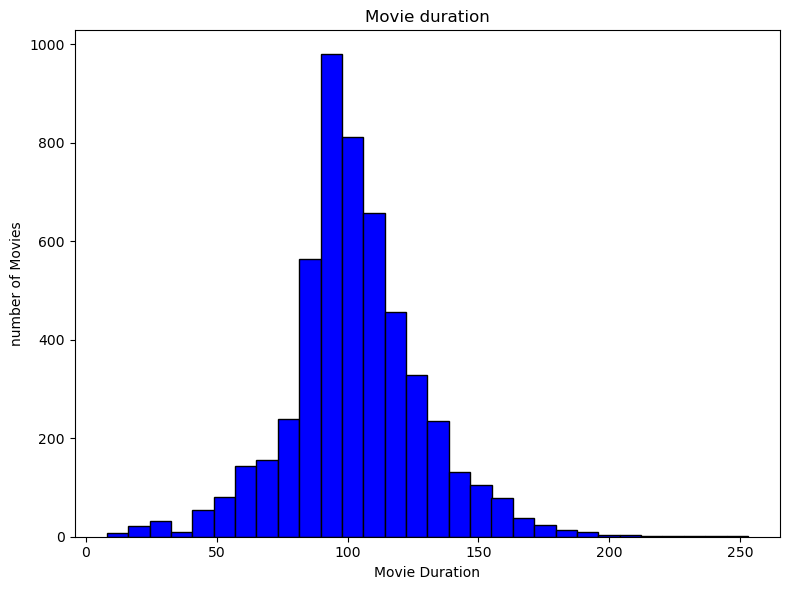

In [29]:
movie_df = df[df["type"] == "Movie"].copy()
movie_df["duration_int"] = movie_df["duration"].str.replace("min", "").astype(int)
plt.figure(figsize = (8,6))
plt.hist(movie_df["duration_int"], bins = 30, color= "blue", edgecolor = "black")
plt.title("Movie duration")
plt.xlabel("Movie Duration")
plt.ylabel("number of Movies")
plt.tight_layout()
plt.savefig("Movie_duration_histogram.png")
plt.show()

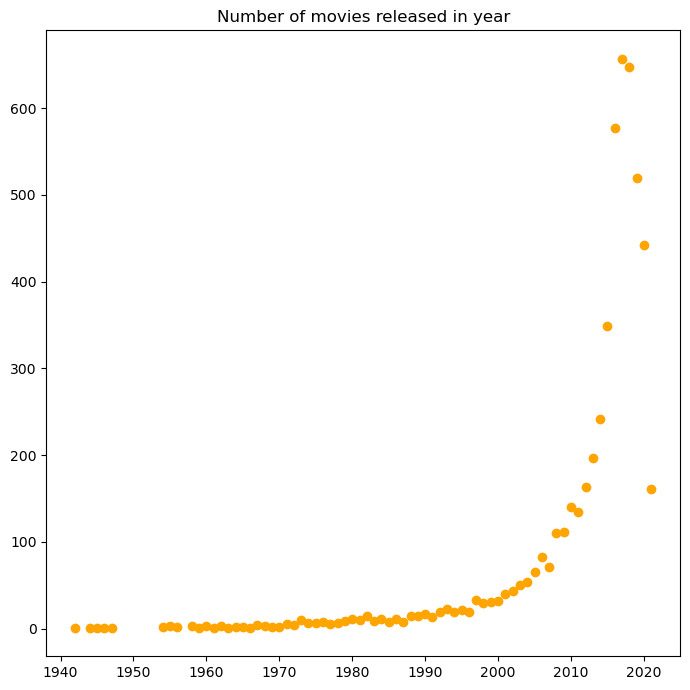

In [32]:
release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize = (7,7))
plt.scatter(release_counts.index, release_counts, color = "Orange")
plt.xlabel = "release year"
plt.ylabel = "number of movies"
plt.title("Number of movies released in year")
plt.tight_layout()
plt.savefig("Number_of_movies_released_in_year.png")
plt.show()

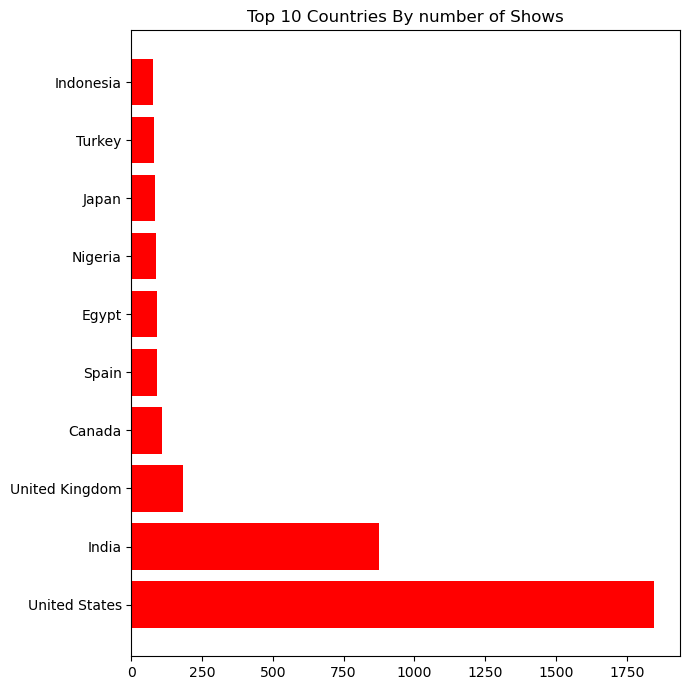

In [34]:
country_counts = df["country"].value_counts().head(10)
plt.figure(figsize = (7,7))
plt.barh(country_counts.index, country_counts, color = "red")
plt.title("Top 10 Countries By number of Shows")
plt.xlabel = "Number for shows"
plt.ylabel = "Countries"
plt.tight_layout()
plt.savefig("Top_Countries_by_number_of_Shows.png")
plt.show()

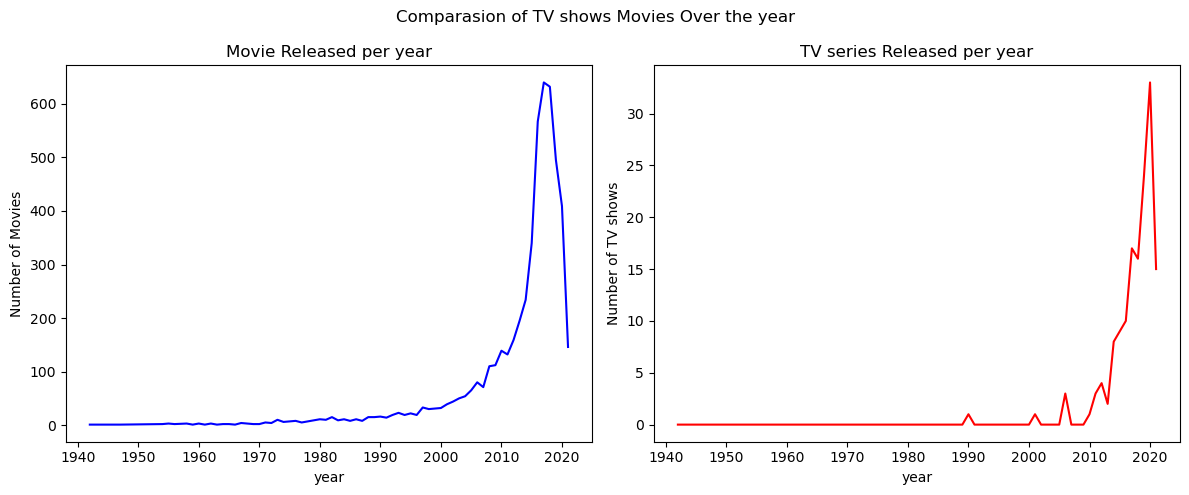

In [39]:
content_by_year= df.groupby(["release_year", "type"]).size().unstack().fillna(0)
fig, ax = plt.subplots(1, 2, figsize = (12,5))

#Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color = "blue")
ax[0].set_title("Movie Released per year")
ax[0].set_xlabel("year")
ax[0].set_ylabel("Number of Movies")

#Series
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color = "Red")
ax[1].set_title("TV series Released per year")
ax[1].set_xlabel("year")
ax[1].set_ylabel("Number of TV shows")

fig.suptitle("Comparasion of TV shows Movies Over the year")
fig.tight_layout()
plt.savefig("Movie_Series_Comparasion.png")
plt.show()